# Multiple Linear Regression Analysis

In this notebook we are using the 'Greece - Agriculture and Rural Development' dataset to perform a multiple linear regression analysis.

## Import packages and classes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

In [3]:
data_raw = pd.read_csv('../../../datasets/Greece - Agriculture and Rural Development/agriculture-and-rural-development_grc.csv')
pd.set_option('display.max_columns', 10)
data_raw.head()

,Agricultural land (% of land area),Agricultural land (sq. km),"Agricultural machinery, tractors","Agricultural machinery, tractors per 100 sq. km of arable land",Agricultural raw materials exports (% of merchandise exports),...,Permanent cropland (% of land area),Rural population,Rural population (% of total population),Rural population growth (annual %),Surface area (sq. km)
0,NaN,NaN,NaN,NaN,NaN,...,NaN,3671291,44.064,NaN,NaN
1,69.123351,89100.0,22630.0,80.994989,NaN,...,7.028704,3657099,43.547,-0.387316,131960.0
2,69.061288,89020.0,24530.0,85.679357,23.071856,...,6.508922,3604016,42.660,-1.462143,131960.0
3,69.984484,90210.0,28500.0,93.228656,16.425263,...,6.508922,3542618,41.778,-1.718278,131960.0
4,69.751746,89910.0,33500.0,111.629457,16.315466,...,6.570985,3480851,40.901,-1.758920,131960.0


In [4]:
variable_x1 = "Crop production index (2014-2016 = 100)"
variable_x2 = "Fertilizer consumption (kilograms per hectare of arable land)"

variable_y = "Cereal production (metric tons)"
data = data_raw[[variable_x1, variable_x2, variable_y]].dropna().reset_index(drop=True)
data.head()

,Crop production index (2014-2016 = 100),Fertilizer consumption (kilograms per hectare of arable land),Cereal production (metric tons)
0,62.570000,56.808876,2243876.0
1,50.700001,69.161718,2426843.0
2,57.430000,71.491986,2122537.0
3,57.150002,82.112629,2874641.0
4,61.770000,83.807422,2940922.0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data[[variable_x1, variable_x2]].to_numpy(), data[variable_y].to_numpy(), test_size=0.2, random_state=42)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(46, 2)
(12, 2)
(46,)
(12,)


In [7]:
model = LinearRegression().fit(X_train, y_train)

In [8]:
print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_}")

Intercept: -302754.0584578244
Slope: [40960.00468321  5869.58929994]


In [9]:
pred = model.predict(X_test)

In [10]:
model.score(X_train, y_train)

0.7928259553181848

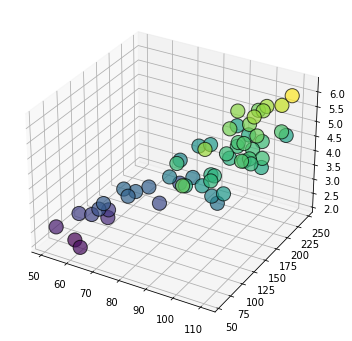

In [11]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[variable_x1], data[variable_x2], data[variable_y],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=data[variable_y])
plt.show()